Samyuktha Chaparla
431881251

In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [2]:
#1.a
df = pd.read_csv('diamonds.csv')

df.head()

,rownames,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


In [3]:
df.dtypes

rownames      int64
carat       float64
cut          object
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [4]:
#1.b Dropping the column 'rownames' and checking if it's dropped or not.
subset_data = df.drop(columns = 'rownames')
subset_data.head()
#1.c Checking if there are any NAN values
subset_data.isna().sum()
#1.d Total Number of rows of data in the data frame
row_length = len(subset_data)
print(f"Total Number of rows of data in the data frame are {row_length}")

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Total Number of rows of data in the data frame are 53940


In [7]:
#1.e
cut_values = set(subset_data['cut'])
print(f"Set of values for column cut: {cut_values} ")
color_values = set(subset_data['color'])
print(f"Set of values for column color: {color_values} ")
clarity_values = set(subset_data['clarity'])
print(f"Set of values for column clarity: {clarity_values} ")

Set of values for column cut: {'Good', 'Very Good', 'Fair', 'Premium', 'Ideal'} 
Set of values for column color: {'D', 'E', 'J', 'G', 'F', 'H', 'I'} 
Set of values for column clarity: {'SI1', 'VS2', 'IF', 'I1', 'VVS1', 'VS1', 'VVS2', 'SI2'} 


In [8]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

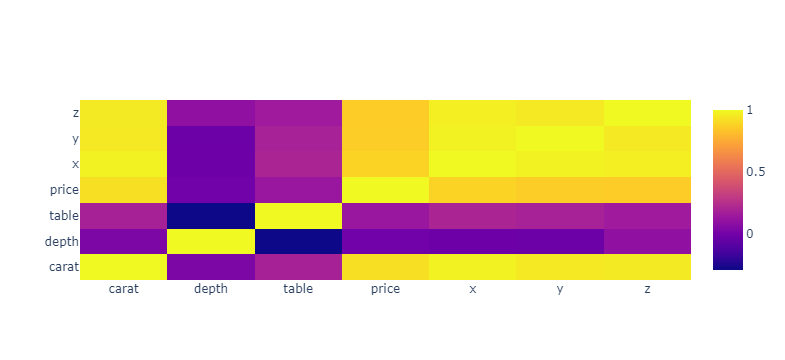

In [9]:
#2 Simple Linear Regression:
#2.a
import matplotlib.pyplot as plt
correl = subset_data[['carat', 'depth', 'table', 'price','x','y','z']].corr()

# Create a heatmap
trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

The quantitative (i.e. not categorical) features has the highest 
correlation with pric is carat which is 0.92.

In [10]:
#2.b
X_train, X_test, y_train, y_test = train_test_split(subset_data['carat'], subset_data['price'], test_size=0.25, random_state=50)
X_train
X_test
y_train
y_test

32301   0.37
39009   0.40
22757   1.02
15129   1.07
17861   1.19
        ... 
48417   0.70
22637   2.00
42891   0.51
38368   0.53
14000   1.19
Name: carat, Length: 40455, dtype: float64

44751   0.51
22963   2.01
9078    1.08
26148   2.13
29451   0.33
        ... 
8884    1.04
34947   0.30
21821   1.50
9942    1.01
8296    1.13
Name: carat, Length: 13485, dtype: float64

32301      454
39009     1056
22757    10773
15129     6082
17861     7207
         ...  
48417     1971
22637    10685
42891     1359
38368     1023
14000     5698
Name: price, Length: 40455, dtype: int64

44751     1619
22963    11011
9078      4521
26148    15454
29451      702
         ...  
8884      4486
34947      378
21821     9892
9942      4693
8296      4385
Name: price, Length: 13485, dtype: int64

The Length of train dataset is 40455
The Length of test dataset is 13485.
The start index for train dataset is 32301
The start index for test dataset is 44751

In [11]:
#2.c
model = LinearRegression(fit_intercept = True)
model.fit(X_train.array.reshape(-1, 1), y_train)

# The following gives the R-square score
model.score(X_train.array.reshape(-1, 1), y_train)

# This is the coefficient Beta_1 (or slope of the Simple Linear Regression line)
model.coef_

# This is the coefficient Beta_0
model.intercept_

LinearRegression()

0.8486051211546091

array([7740.34546342])

-2244.8040004118293

The R-square value is 0.8486051211546091. This score indicates that the model explains around 84.9% of the variance in the target variable (dependent variable) using the independent variable in the model.
The coefficient Beta_0 value is -2244.804. The negative intercept indicates that the dependent variable has a baseline value even when the independent variable is absent or equal to 0.
The positive coefficient (Beta_1) of around 7740.345 indicates a positive linear relationship between the independent and dependent variables.
The model seems to be a good fit with R-sqaure value approx 0.849

In [12]:
#2.d
test_output = pd.DataFrame(model.predict(X_test.array.reshape(-1, 1)), index = X_test.index, columns = ['pred_Price'])
test_output.head()

,pred_Price
44751,"1,702.77"
22963,"13,313.29"
9078,"6,114.77"
26148,"14,242.13"
29451,309.51


In [13]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_Price'] - test_output['price']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)

,pred_Price,price
44751,"1,702.77",1619
22963,"13,313.29",11011
9078,"6,114.77",4521
26148,"14,242.13",15454
29451,309.51,702


Mean absolute error is 
998.4973200867952


In [14]:
fraction_of_MAE_to_avg_price = mean_absolute_error/test_output['price'].mean()
print(f"fraction_of_MAE_to_avg_price:{fraction_of_MAE_to_avg_price}")

fraction_of_MAE_to_avg_price:0.25412063999512985


From the above calculated R-square value  (0.849) and strong coefficients Beta_0 = -2244.804, Beta_1 ≈ 7740.345,I expected smaller prediction errors. However, the observed mean absolute error (MAE) of about 998.497 and its fraction to the average price (0.2541) show a significant mismatch, which could be due to undetected data changes or model constraints.

In [15]:
#3. Multiple Linear Regression without using categorical variables.
#3.a
X_train, X_test, y_train, y_test = train_test_split(subset_data.drop(columns = ['price','cut','color','clarity']), subset_data['price'], test_size=0.25, random_state=50)
X_train
X_test
y_train
y_test

,carat,depth,table,x,y,z
32301,0.37,60.70,60.00,4.65,4.68,2.83
39009,0.40,61.70,57.00,4.77,4.73,2.93
22757,1.02,61.40,58.00,6.46,6.43,3.96
15129,1.07,62.30,55.00,6.59,6.54,4.09
17861,1.19,61.70,56.00,6.78,6.81,4.19
...,...,...,...,...,...,...
48417,0.70,62.40,58.00,5.62,5.67,3.52
22637,2.00,60.30,56.00,8.27,8.16,4.94
42891,0.51,62.80,57.00,5.12,5.10,3.21
38368,0.53,63.80,57.00,5.10,5.12,3.26


,carat,depth,table,x,y,z
44751,0.51,61.40,58.00,5.13,5.09,3.14
22963,2.01,62.90,54.00,8.06,7.93,5.05
9078,1.08,62.10,59.00,6.57,6.53,4.07
26148,2.13,61.50,57.00,8.27,8.34,5.11
29451,0.33,61.90,56.00,4.46,4.49,2.77
...,...,...,...,...,...,...
8884,1.04,62.40,56.00,6.40,6.48,4.02
34947,0.30,61.90,60.00,4.27,4.29,2.65
21821,1.50,60.20,61.00,7.27,7.32,4.39
9942,1.01,61.10,56.00,6.44,6.48,3.95


32301      454
39009     1056
22757    10773
15129     6082
17861     7207
         ...  
48417     1971
22637    10685
42891     1359
38368     1023
14000     5698
Name: price, Length: 40455, dtype: int64

44751     1619
22963    11011
9078      4521
26148    15454
29451      702
         ...  
8884      4486
34947      378
21821     9892
9942      4693
8296      4385
Name: price, Length: 13485, dtype: int64

The Length of train dataset is 40455
The Length of test dataset is 13485.
The start index for train dataset is 32301
The start index for test dataset is 44751
The length of the test and train data didn't change from SLR. It's the same for both SLR and Multiple Linear Regression.
The rst row's index 
for both remaisn the sam as in the Simple Linear Regression.


In [16]:
#3.b
model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train) 

# The following gives the R-square score
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_6
model.coef_

# This is the coefficient Beta_0
model.intercept_

LinearRegression()

0.858089270729732

array([10572.42070164,  -212.30889735,  -100.98829263, -1339.48535974,
          28.72790744,   207.71501298])

21184.40695343029

The multiple linear regression model has a little better R-squared value (0.858) than simple linear regression (0.849), indicating a slight improvement in the variance in the dependant variable. The inclusion of additional variables produces different coefficient values, showing the influence of these factors on the target variable and predicting a better overall fit


In [17]:
#3.c
test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_Price'])
test_output.head()

,pred_Price
44751,"1,610.14"
22963,"14,107.90"
9078,"5,692.50"
26148,"15,113.80"
29451,606.29


In [18]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_Price'] - test_output['price']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)

,pred_Price,price
44751,"1,610.14",1619
22963,"14,107.90",11011
9078,"5,692.50",4521
26148,"15,113.80",15454
29451,606.29,702


Mean absolute error is 
882.5996348444379


In [19]:
fraction_of_MAE_to_avg_price = mean_absolute_error/test_output['price'].mean()
print(f"fraction_of_MAE_to_avg_price:{fraction_of_MAE_to_avg_price}")

fraction_of_MAE_to_avg_price:0.22462432252360995


After Comparing the metrics from multiple linear regression (MLR) and simple linear regression (SLR), it shows that prediction accuracy on the test set has improved. The mean absolute error (MAE) reduced from roughly 998.497 (SLR) to 882.600 (MLR), while the fraction of MAE to the average price reduced from around 0.2541 (SLR) to 0.2246 (MLR).These improvements indicates that the MLR model better captures the complexities of the data by considering additional features, leading to more accurate predictions on the test set.

In [5]:
#4 Multiple Linear Regression with Categorical Variables
#4.a
subset_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


In [6]:
#4.b
from sklearn.preprocessing import OneHotEncoder

def get_ohe(df, col):
    ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False, dtype='int')
    ohe.fit(df[[col]])
    temp_df = pd.DataFrame(data=ohe.transform(df[[col]]), columns=ohe.get_feature_names_out())
    # If you have a newer version, replace with columns=ohe.get_feature_names_out()
    df.drop(columns=[col], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

In [7]:
subset_data = get_ohe(subset_data, 'cut')
subset_data = get_ohe(subset_data, 'color')
subset_data = get_ohe(subset_data, 'clarity')

subset_data.head(20)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.50,55.00,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.80,61.00,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.90,65.00,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.40,58.00,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.30,58.00,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0.24,62.80,57.00,336,3.94,3.96,2.48,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,0.24,62.30,57.00,336,3.95,3.98,2.47,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7,0.26,61.90,55.00,337,4.07,4.11,2.53,0,0,0,...,1,0,0,0,1,0,0,0,0,0
8,0.22,65.10,61.00,337,3.87,3.78,2.49,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.23,59.40,61.00,338,4.00,4.05,2.39,0,0,0,...,1,0,0,0,0,0,1,0,0,0


There are 24 columns in the eventual set.
After one-hot encoding, each categorical variable is represented by binary columns, with the number of columns equal to the number of distinct categories minus one. Given three categorical variables, the total number of columns in the eventual set is determined by the sum of unique categories across all variables after encoding, minus the number of categorical variables.


In [8]:
#4.c
X_train, X_test, y_train, y_test = train_test_split(subset_data.drop(columns = ['price']), subset_data['price'], test_size=0.25, random_state=50)

X_train
X_test
y_train
y_test

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
32301,0.37,60.70,60.00,4.65,4.68,2.83,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
39009,0.40,61.70,57.00,4.77,4.73,2.93,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
22757,1.02,61.40,58.00,6.46,6.43,3.96,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
15129,1.07,62.30,55.00,6.59,6.54,4.09,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
17861,1.19,61.70,56.00,6.78,6.81,4.19,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48417,0.70,62.40,58.00,5.62,5.67,3.52,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
22637,2.00,60.30,56.00,8.27,8.16,4.94,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
42891,0.51,62.80,57.00,5.12,5.10,3.21,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
38368,0.53,63.80,57.00,5.10,5.12,3.26,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
44751,0.51,61.40,58.00,5.13,5.09,3.14,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22963,2.01,62.90,54.00,8.06,7.93,5.05,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
9078,1.08,62.10,59.00,6.57,6.53,4.07,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
26148,2.13,61.50,57.00,8.27,8.34,5.11,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
29451,0.33,61.90,56.00,4.46,4.49,2.77,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8884,1.04,62.40,56.00,6.40,6.48,4.02,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
34947,0.30,61.90,60.00,4.27,4.29,2.65,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
21821,1.50,60.20,61.00,7.27,7.32,4.39,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9942,1.01,61.10,56.00,6.44,6.48,3.95,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


32301      454
39009     1056
22757    10773
15129     6082
17861     7207
         ...  
48417     1971
22637    10685
42891     1359
38368     1023
14000     5698
Name: price, Length: 40455, dtype: int64

44751     1619
22963    11011
9078      4521
26148    15454
29451      702
         ...  
8884      4486
34947      378
21821     9892
9942      4693
8296      4385
Name: price, Length: 13485, dtype: int64

In [9]:
model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train) 

# The following gives the R-square score
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_10 (7 more for non-linear)
model.coef_

# This is the coefficient Beta_0
model.intercept_

LinearRegression()

0.9197535054831985

array([ 1.11814801e+04, -5.85181599e+01, -2.43103736e+01, -9.47154791e+02,
        4.71160598e+00, -9.21343078e+01,  5.64156045e+02,  8.35219660e+02,
        7.65684380e+02,  7.33319794e+02, -2.25861063e+02, -2.76687793e+02,
       -4.79782911e+02, -9.73649105e+02, -1.46411040e+03, -2.39532202e+03,
        5.45238205e+03,  3.78052359e+03,  2.82037545e+03,  4.70977853e+03,
        4.38909093e+03,  5.12101322e+03,  5.07443217e+03])

1499.3392254312134

The Multiple linear regression model, which now takes into account additional characteristics such as categorical data, does a far better job of describing our results than the previous one. It has a score of approximately 0.920, indicating a strong fit. The Beta_0 value is around 1499.339.Each coefficient reflects how much the corresponding feature influences the target variable. This improvement allows us to better understand how many factors influence predictions, making the model more valuable overall.

In [25]:
#4.d
test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_price'])
test_output.head()

,pred_price
44751,"1,952.74"
22963,"12,178.85"
9078,"5,091.65"
26148,"15,140.76"
29451,137.09


In [26]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_price'] - test_output['price']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)

,pred_price,price
44751,"1,952.74",1619
22963,"12,178.85",11011
9078,"5,091.65",4521
26148,"15,140.76",15454
29451,137.09,702


Mean absolute error is 
744.8276400124356


In [27]:
fraction_of_MAE_to_avg_price = mean_absolute_error/test_output['price'].mean()
print(f"fraction_of_MAE_to_avg_price:{fraction_of_MAE_to_avg_price}")

fraction_of_MAE_to_avg_price:0.18956092596179364


An average absolute error of approximately 745, coupled with its ratio to the mean price being roughly 0.19, indicates that our enhanced model, which includes additional variables, performs commendably in forecasting results. Given that the model now aligns more closely with the data, evidenced by an R-square value close to 0.92, it logically follows that there has been a reduction in predictive errors. This marks a significant enhancement from the previous error ratio of around 0.23, highlighting the beneficial impact of incorporating more variables. Essentially, it signifies an improvement in the predictive accuracy of our model.

In [28]:
#5 Quantile Regression with Categorical Variables
#5.a
X_train, X_test, y_train, y_test = train_test_split(subset_data.drop(columns = ['price']), subset_data['price'], test_size=0.25, random_state=50)

X_train
X_test
y_train
y_test

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
32301,0.37,60.70,60.00,4.65,4.68,2.83,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
39009,0.40,61.70,57.00,4.77,4.73,2.93,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
22757,1.02,61.40,58.00,6.46,6.43,3.96,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
15129,1.07,62.30,55.00,6.59,6.54,4.09,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
17861,1.19,61.70,56.00,6.78,6.81,4.19,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48417,0.70,62.40,58.00,5.62,5.67,3.52,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
22637,2.00,60.30,56.00,8.27,8.16,4.94,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
42891,0.51,62.80,57.00,5.12,5.10,3.21,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
38368,0.53,63.80,57.00,5.10,5.12,3.26,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
44751,0.51,61.40,58.00,5.13,5.09,3.14,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22963,2.01,62.90,54.00,8.06,7.93,5.05,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
9078,1.08,62.10,59.00,6.57,6.53,4.07,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
26148,2.13,61.50,57.00,8.27,8.34,5.11,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
29451,0.33,61.90,56.00,4.46,4.49,2.77,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8884,1.04,62.40,56.00,6.40,6.48,4.02,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
34947,0.30,61.90,60.00,4.27,4.29,2.65,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
21821,1.50,60.20,61.00,7.27,7.32,4.39,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9942,1.01,61.10,56.00,6.44,6.48,3.95,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


32301      454
39009     1056
22757    10773
15129     6082
17861     7207
         ...  
48417     1971
22637    10685
42891     1359
38368     1023
14000     5698
Name: price, Length: 40455, dtype: int64

44751     1619
22963    11011
9078      4521
26148    15454
29451      702
         ...  
8884      4486
34947      378
21821     9892
9942      4693
8296      4385
Name: price, Length: 13485, dtype: int64

In [29]:
import statsmodels.formula.api as smf

In [32]:
import statsmodels.api as sm

# Create the design matrix (independent variables) and target variable
X = subset_data.drop(columns=['price'])
y = subset_data['price']

# Create the quantile regression model
mod = sm.QuantReg(y, X)
# Fit the model using the desired quantile
res = mod.fit(q=0.5)  # For median (50th percentile)

# Display the results
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.7709
Model:                       QuantReg   Bandwidth:                       54.44
Method:                 Least Squares   Sparsity:                        946.8
Date:                Sat, 10 Feb 2024   No. Observations:                53940
Time:                        00:36:08   Df Residuals:                    53917
                                        Df Model:                           23
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
carat          1.293e+04     19.210    672.857      0.000    1.29e+04     1.3e+04
depth            55.0542      0.839     65.590      0.000      53.409      56.699
table           -20.2867      0.898    -22.593      0.000     -22.047     -18.527
x              -559.4452     12.904  

In [42]:
#5.b
# Predict prices using quantile regression parameters
predicted_prices = X_test.dot(res.params)

test_output = pd.DataFrame(predicted_prices, index=X_test.index, columns=['pred_price'])
test_output = test_output.merge(y_test, left_index=True, right_index=True)
test_output.head()

# Calculate mean absolute error
mean_absolute_error = abs(test_output['pred_price'] - test_output['price']).mean()
print(f'Mean absolute error is: {mean_absolute_error}')

# Calculate fraction of MAE to the average price
fraction_of_MAE_to_avg_price = mean_absolute_error / test_output['price'].mean()
print(f"Fraction of MAE to the average price: {fraction_of_MAE_to_avg_price}")


,pred_price,price
44751,"1,680.79",1619
22963,"12,604.23",11011
9078,"5,096.39",4521
26148,"15,062.74",15454
29451,430.84,702


Mean absolute error is: 644.5243363431474
Fraction of MAE to the average price: 0.16403342657917164


Utilizing the median as our prediction basis, we observed a reduction in the mean absolute error (MAE) to roughly 644.52, signifying that our prediction deviations averaged nearly 644.52. Furthermore, the ratio of MAE to the mean price was close to 0.164, suggesting that the prediction errors constituted approximately 16.4% of the mean price. This represents a significant enhancement from our earlier model, which had an MAE of about 745 and a ratio near 0.19. Such progress underscores the efficacy of employing the median for regression analysis in achieving enhanced prediction accuracy.